In [1]:
from datetime import datetime
import os
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import datajoint as dj
from pipeline import (reference, subject, acquisition, stimulation, analysis,
                      intracellular, extracellular, behavior, utilities)

Connecting root@127.0.0.1:3306


Display the schema diagram of the entire data pipeline

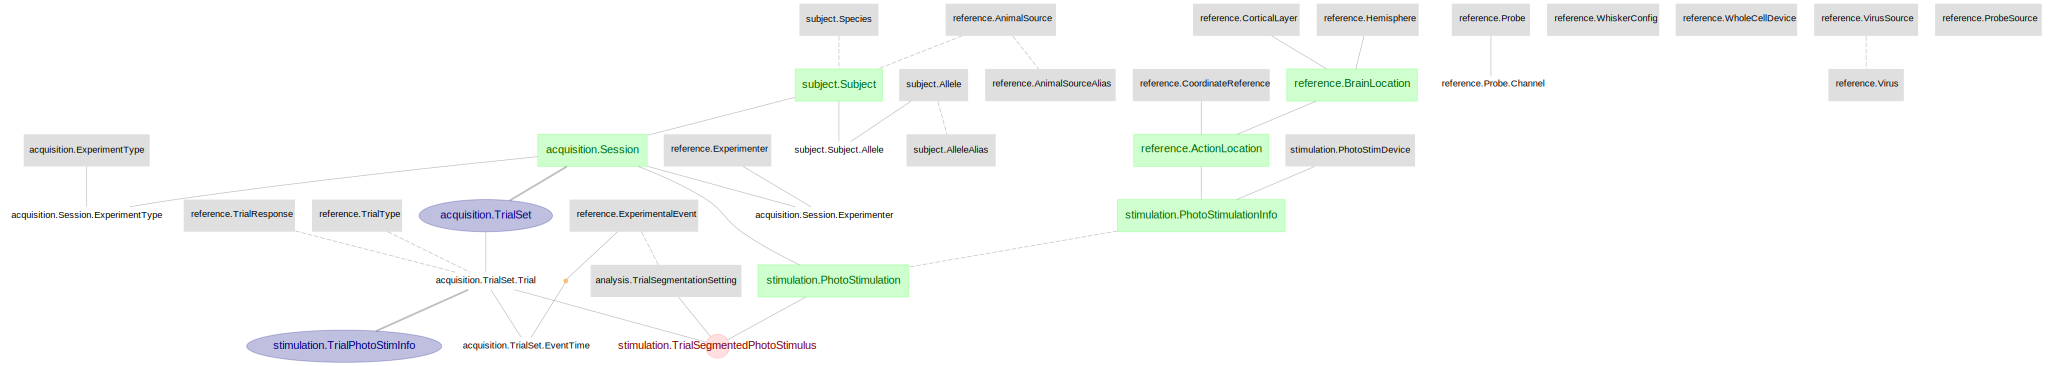

In [6]:
core_erd = dj.ERD(reference) + dj.ERD(subject) + dj.ERD(acquisition) + dj.ERD(stimulation)
core_erd

Query raw whole-cell recording

In [ ]:
subject.Subject()

In [ ]:
acquisition.Cell & 'subject_id = "ANM300476"'

In [ ]:
sess_keys = acquisition.Session.fetch(dj.key)
acquisition.Session()

In [ ]:
sess_key = sess_keys[0]
print(sess_key)

In [ ]:
cell_key = (acquisition.Cell & sess_key).fetch1(dj.key)
Vm, Vm_wo_spike, timestamps = (acquisition.IntracellularAcquisition.MembranePotential & cell_key).fetch1(
    'membrane_potential',
    'membrane_potential_wo_spike',
    'membrane_potential_time_stamps')

In [ ]:
plt.plot(timestamps,Vm)

In [ ]:
plt.plot(timestamps,Vm_wo_spike)

Photostimulus 

In [ ]:
photostim, photostim_timestamps = (acquisition.PhotoStimulation & sess_key).fetch1('photostim_timeseries','photostim_time_stamps')

In [ ]:
plt.plot(photostim_timestamps,photostim)

In [ ]:
current, current_timestamps = (acquisition.IntracellularAcquisition.CurrentInjection & cell_key).fetch1(
    'current_injection',
    'current_injection_time_stamps')

In [ ]:
current_timestamps = current_timestamps[0,:]

In [ ]:
plt.plot(current_timestamps,current)

In [ ]:
acquisition.TrialSet.TrialInfo()

In [ ]:
acquisition.TrialSet.Trial()